# Data Analysis - Lab 3
### M. Sébastien MASCHA & M. Sauvage Pierre
### ISEP Paris – September 24th, 2019
<br/>
<br/>

___
# Import of libraries

This document has been done using python on Jupyter Notebook with the librairies:
 
- Numpy to manipulate arrays
- matplotlib to plot graphics
- pandas to import csv
- scipy for mathematicals usage
- maths for sqrt, pi, exp

In [5]:
# coding: utf-8

import data

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding

# Exercice B.1 - MDS, LLE and Isomap
We are now going to study the "golub" data. These data contains the level of expression of 7129 genes based on 72 sample. Each sample is linked to a variant of Leukemia: AML(25) and ALL(47). Our goal is to visualize the 72 samples on a 2D plan.

### Question 1 - Load the file Golub_data

We use the semicolon separator because we saw in the text editor that the data was separated
by semicolon.

In [6]:
golub_df = pd.read_csv("data/golub_data.csv", sep=',')
golub_df.head()

,Ex 1,Ex 2,Ex 3,Ex 4,Ex 5,Ex 6,Ex 7,Ex 8,Ex 9,Ex 10,...,Ex 63,Ex 64,Ex 65,Ex 66,Ex 67,Ex 68,Ex 69,Ex 70,Ex 71,Ex 72
G 1,-214,-139,-76,-135,-106,-138,-72,-413,5,-88,...,-90,-137,-157,-172,-47,-62,-58,-161,-48,-176
G 2,-153,-73,-49,-114,-125,-85,-144,-260,-127,-105,...,-87,-51,-370,-122,-442,-198,-217,-215,-531,-284
G 3,-58,-1,-307,265,-76,215,238,7,106,42,...,102,-82,-77,38,-21,-5,63,-46,-124,-81
G 4,88,283,309,12,168,71,55,-2,268,219,...,319,178,340,31,396,141,95,146,431,9
G 5,-295,-264,-376,-419,-230,-272,-399,-541,-210,-178,...,-283,-135,-438,-201,-351,-256,-191,-172,-496,-294


### Question 2 - Open the label in the file Golub_class2. 
Once again, be very careful with the opening parameters.

In [7]:
golub_class = pd.read_csv("data/golub_class2.csv", sep=',',header=None)
golub_class.shape

(72, 2)

### Question 3 - Run a PCA on the Golub data, and visualize the result.

In [8]:
def circleOfCorrelations(pc_infos, ebouli):
    fig = plt.figure(figsize = (12,12))
    plt.Circle((0,0),radius=10, color='g', fill=False)
    circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
    fig = plt.gcf()
    fig.gca().add_artist(circle1)
    for idx in range(len(pc_infos["PC-0"])):
        x = pc_infos["PC-0"][idx]
        y = pc_infos["PC-1"][idx]
        plt.plot([0.0,x],[0.0,y],'k-')
        plt.plot(x, y, 'rx')
        plt.annotate(pc_infos.index[idx], xy=(x,y))
    plt.xlabel("PC-0 (%s%%)" % str(ebouli[0])[:4].lstrip("0."))
    plt.ylabel("PC-1 (%s%%)" % str(ebouli[1])[:4].lstrip("0."))
    plt.xlim((-1,1))
    plt.ylim((-1,1))
    plt.title("Circle of Correlations")  
    
def myPCA(df, clusters=None):
    # Normalize data
    df_norm = (df - df.mean()) / df.std()
    # PCA
    pca = PCA(n_components='mle')
    pca_res = pca.fit_transform(df_norm.values)
    # Ebouli
    ebouli = pd.Series(pca.explained_variance_ratio_)
    ebouli.plot(kind='bar', title="Ebouli des valeurs propres")
    plt.show()
    # Circle of correlations
    coef = np.transpose(pca.components_)
    cols = ['PC-'+str(x) for x in range(len(ebouli))]
    pc_infos = pd.DataFrame(coef, columns=cols, index=df_norm.columns)
    circleOfCorrelations(pc_infos, ebouli)
    plt.show()
    return pc_infos, ebouli

myPCA(golub_df)

NameError: name 'PCA' is not defined

### Question 4 - Use the MDS function from the package MDS to run a MDS on these data. 
Compare with the PCA result and comment.

In [54]:
embedding = MDS()
X_transformed = embedding.fit_transform(golub_df.values[:100])
X_transformed.shape

(100, 2)

### Question 5 - Apply LLE to the Golub data, with 3, 5, 8, 10, 12 and 15 neighbors.
Using the LocallyLinearEmbedding package from sklearn.

Analyze the results and determine the best neighborhood model. Use the plt.subplot function rather than the regular plot function for this question.

In [59]:
embedding = LocallyLinearEmbedding()
X_transformed = embedding.fit_transform(golub_df[:100])
X_transformed.shape

(100, 2)

### Question 6 - Same question for the Isomap() function from the Isomap package.
Use 4, 8, 10, 13, 16 and 20 neighbors instead.

# Exercice B.2 - Alon
Load the Alon data, describe their content and apply the same algorithms as in the previous exercise.
### Load the file alon.csv

In [70]:
alon_df = pd.read_csv("data/alon.csv", sep=';')
alon_df.head()

,Hsa.3004,Hsa.13491,Hsa.13491.1,Hsa.37254,Hsa.541,Hsa.20836,Hsa.1977,Hsa.44472,Hsa.3087,Hsa.1447,...,Hsa.2618,Hsa.27285,Hsa.41260,Hsa.14822,Hsa.336,Hsa.984,Hsa.35124,Hsa.3952,Hsa.32734,Hsa.9683
0,15.161878,9.437886,7.228324,6.864347,3.073544,9.096942,3.388666,4.495803,13.212367,7.859688,...,-0.408666,-0.466526,-0.113772,-0.335694,-0.428619,-0.517674,-0.466031,-0.451634,-0.437257,-0.537792
1,13.131232,9.450446,6.686033,4.931565,2.367608,7.719571,5.128649,3.539225,9.899418,6.563777,...,-0.475624,-0.527643,-0.521560,-0.439791,-0.542699,-0.538498,-0.437367,-0.385619,-0.599566,-0.641271
2,4.658592,8.748834,6.667209,5.803129,1.199826,1.727416,1.406442,1.597463,3.970835,3.306997,...,-0.119953,-0.209910,-0.277052,-0.065272,-0.217389,-0.025341,-0.276883,-0.262016,-0.296575,-0.297785
3,10.563792,13.364874,10.047634,6.530421,3.026227,3.253446,2.188840,2.514740,6.342561,8.331140,...,-0.259611,-0.456618,-0.520114,-0.205599,-0.398273,-0.410386,-0.444789,-0.455126,-0.441876,-0.502069
4,7.022636,8.122147,7.426341,7.575234,4.537741,6.294042,4.272008,6.355163,7.195669,6.736173,...,-0.330511,-0.448630,-0.247855,-0.483929,-0.500843,-0.100952,-0.456922,-0.493642,-0.612353,-0.554739


### Open the label in the file alon_class. 
Once again, be very careful with the opening parameters.

In [69]:
# Open the class file
alon_class = pd.read_csv("data/alon_class.csv", sep=',')
alon_class.shape

(62, 1)

### Run a PCA on the Alon data, and visualize the result.

### Use the MDS function from the package MDS to run a MDS on these data. 
Compare with the PCA result and comment.

In [60]:
embedding = MDS()
X_transformed = embedding.fit_transform(alon_df.values)
X_transformed.shape

(62, 2)

### Apply LLE to the Alon data, with 3, 5, 8, 10, 12 and 15 neighbors.
Using the LocallyLinearEmbedding package from sklearn.

Analyze the results and determine the best neighborhood model. Use the plt.subplot function rather than the regular plot function for this question.

KeyError: 'principal component 1'

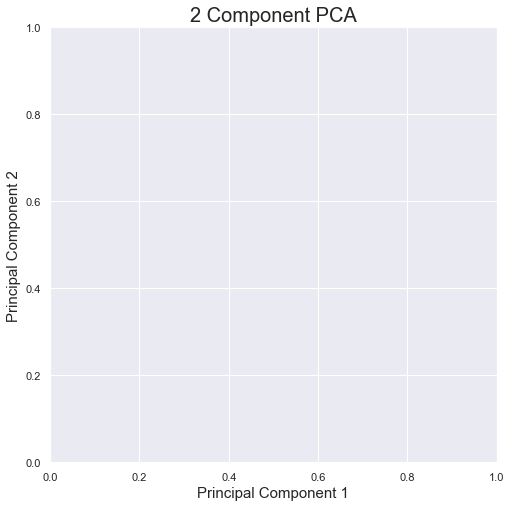

In [72]:
embedding = LocallyLinearEmbedding(n_neighbors=5)
X_transformed = embedding.fit_transform(alon_df[:100])
X_transformed.shape

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = alon_class.x.unique()
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = alon_class['x'] == target
    ax.scatter(alon_df.loc[indicesToKeep, 'principal component 1']
               , alon_df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 40)
ax.legend(targets)
ax.grid()

### Same question for the Isomap() function from the Isomap package.
Use 4, 8, 10, 13, 16 and 20 neighbors instead.